In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression , Ridge
from xgboost import XGBRegressor

In [148]:
df=pd.read_excel("premiums_with_life_style.xlsx")

In [149]:
df.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


### EDA

In [151]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Physical_Activity',
       'Stress_Level', 'Number Of Dependants', 'BMI_Category',
       'Smoking_Status', 'Employment_Status', 'Income_Level', 'Income_Lakhs',
       'Medical History', 'Insurance_Plan', 'Annual_Premium_Amount'],
      dtype='object')

In [152]:
df.shape

(10000, 15)

In [153]:
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.316300,3.192900,23.339900,19505.063900
std,57.971661,21.650454,32.302974,8893.649171
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11777.750000
50%,37.000000,2.000000,16.000000,19312.000000
75%,50.000000,3.000000,31.000000,26494.500000
max,1178.000000,456.000000,960.000000,45854.000000


In [154]:
df.isna().sum()

Age                       0
Gender                    0
Region                    0
Marital_status            0
Physical_Activity         0
Stress_Level              0
Number Of Dependants      0
BMI_Category              0
Smoking_Status            9
Employment_Status         7
Income_Level             18
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

In [155]:
df.dropna(inplace=True)

In [156]:
df.shape

(9973, 15)

In [157]:
column_names=df.columns

In [158]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.head(3)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459


In [159]:
numeric_column=df.select_dtypes(include=['float64', 'int64']).columns
numeric_column

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

In [160]:
string_columns = df.select_dtypes(include=['object']).columns
string_columns

Index(['gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'bmi_category', 'smoking_status', 'employment_status',
       'income_level', 'medical_history', 'insurance_plan'],
      dtype='object')

In [161]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


### Numeric UNivariate Analysis

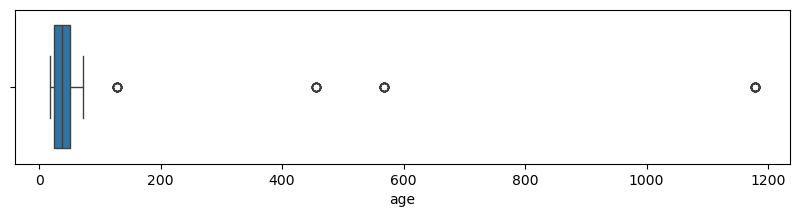

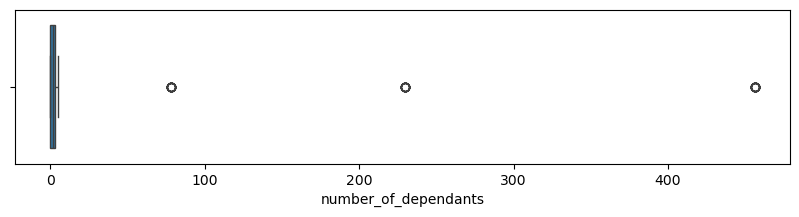

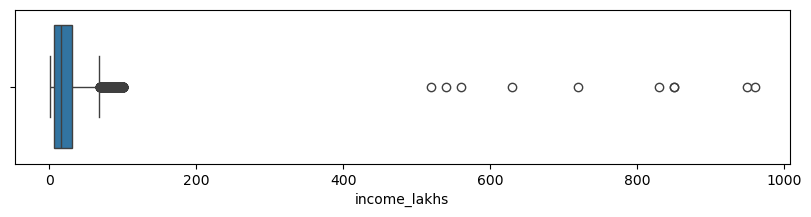

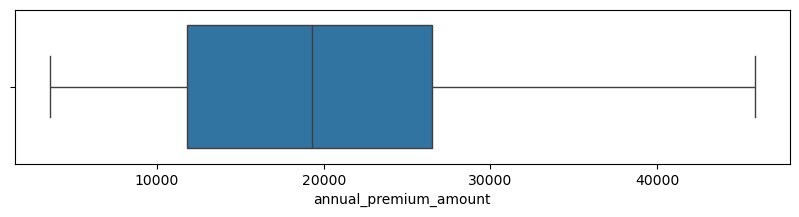

In [163]:
for col in numeric_column:
    plt.figure(figsize=(10,2))
    sns.boxplot(x=df[col])

In [164]:
df[df["age"]>100]['age'].unique()

array([ 128, 1178,  567,  456])

In [165]:
age_cleaned_df=df[df["age"]<=100]

In [166]:
age_cleaned_df.age.describe()

count    9915.000000
mean       37.743621
std        13.975462
min        18.000000
25%        24.000000
50%        37.000000
75%        50.000000
max        72.000000
Name: age, dtype: float64

In [167]:
age_cleaned_df.number_of_dependants.unique()

array([  2,   5,   0,   3,   1,   4, 456,  78, 230])

In [168]:
age_nofd_clnd_df=age_cleaned_df[age_cleaned_df["number_of_dependants"]<=5]

In [169]:
age_nofd_clnd_df.number_of_dependants.describe()

count    9868.000000
mean        1.919133
std         1.503264
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: number_of_dependants, dtype: float64

In [170]:
age_nofd_clnd_df.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


In [171]:
age_nofd_clnd_df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9868.000000,9868.000000,9868.000000,9868.000000
mean,37.756486,1.919133,23.411634,19511.417714
std,13.976822,1.503264,32.437621,8900.941540
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11776.250000
50%,37.000000,2.000000,16.000000,19327.500000
75%,50.000000,3.000000,31.000000,26505.250000
max,72.000000,5.000000,960.000000,45854.000000


In [172]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower, upper = get_iqr_bounds(age_nofd_clnd_df['income_lakhs'])
lower, upper

(-31.5, 68.5)

In [173]:
age_nofd_clnd_df.income_lakhs.quantile(0.99)

97.0

In [174]:
quantile_threshold=age_nofd_clnd_df.income_lakhs.quantile(0.99)

In [175]:
age_nofd_clnd_df.shape

(9868, 15)

In [176]:
df4=age_nofd_clnd_df[age_nofd_clnd_df["income_lakhs"]<quantile_threshold]

In [177]:
df4.shape

(9767, 15)

In [178]:
numeric_column

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

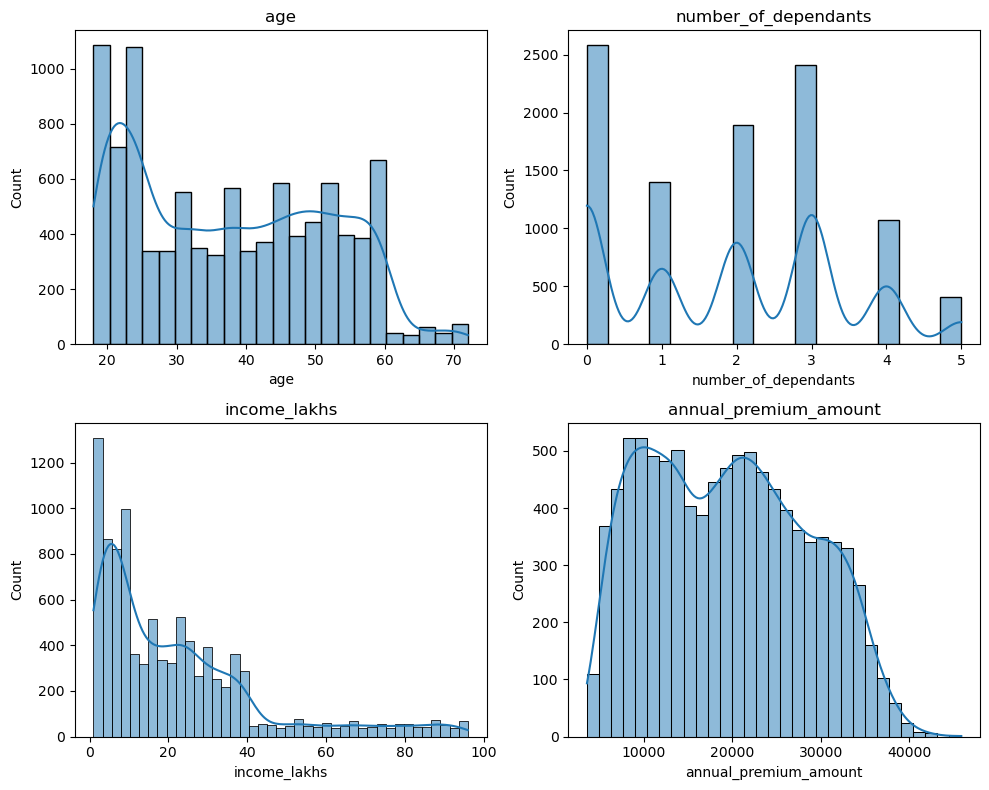

In [179]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_column):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df4[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

### Numeric BivariateAnalysis 

In [181]:
numeric_column

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

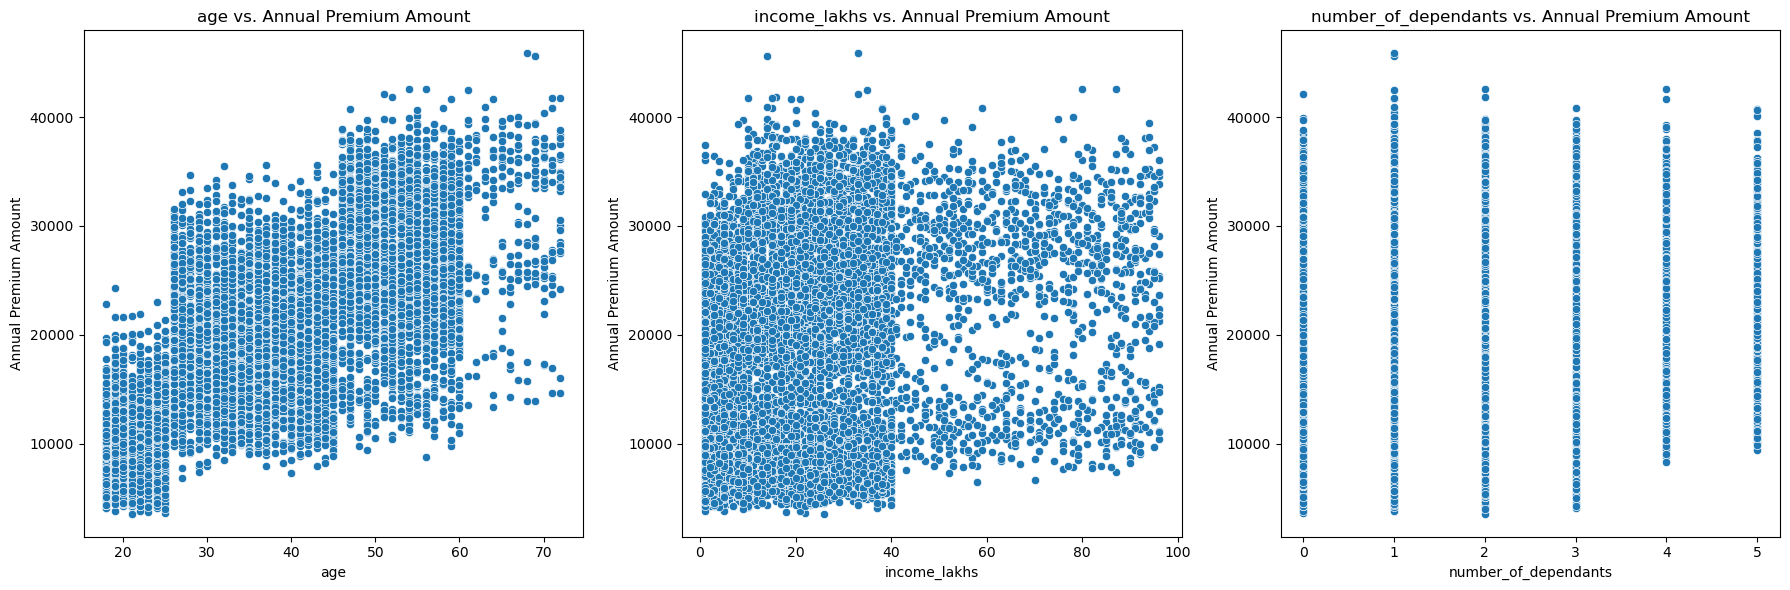

In [182]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x=df4[column], y=df4['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

### Categorical Analysis

## Univariate Analysis Categorical

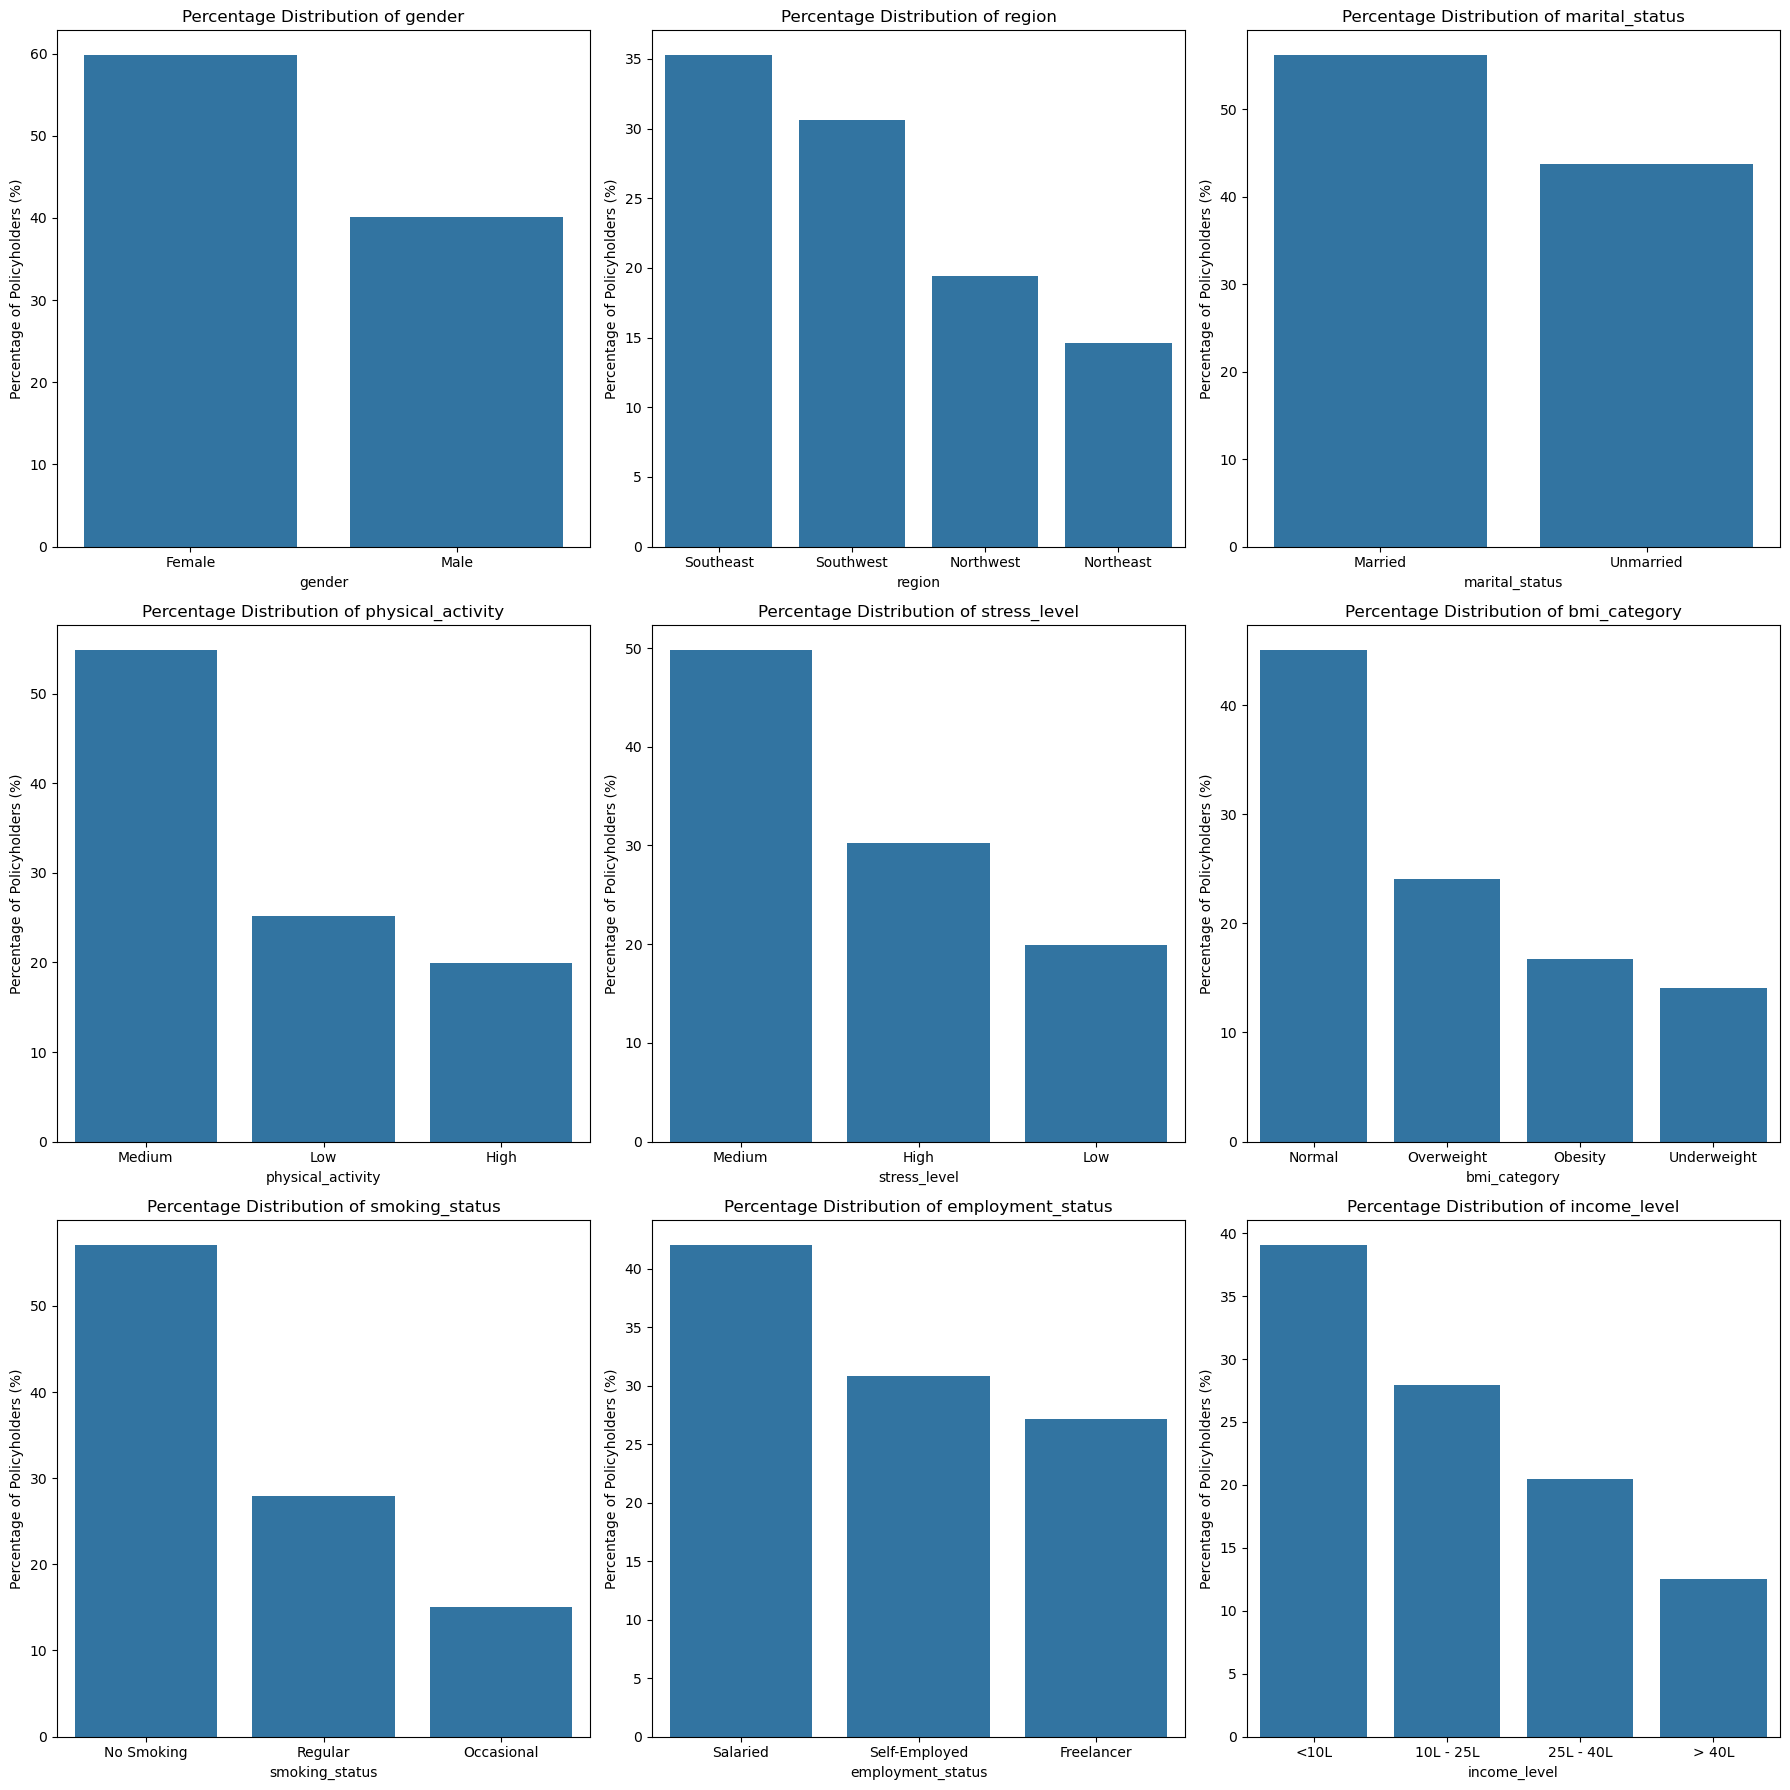

In [185]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, string_columns):
    # Calculate the percentage distribution of each category
    category_counts = df4[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

In [186]:
df4.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108


In [187]:
for column in string_columns:
    print(f"{column} : {df4[column].unique()}")

gender : ['Female' 'Male']
region : ['Southeast' 'Northeast' 'Southwest' 'Northwest']
marital_status : ['Unmarried' 'Married']
physical_activity : ['Medium' 'Low' 'High']
stress_level : ['Medium' 'High' 'Low']
bmi_category : ['Normal' 'Overweight' 'Obesity' 'Underweight']
smoking_status : ['No Smoking' 'Occasional' 'Regular']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['25L - 40L' '10L - 25L' '<10L' '> 40L']
medical_history : ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
insurance_plan : ['Gold' 'Silver' 'Bronze']


### NOminal category

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          822   909     998
25L - 40L          533   733     733
<10L              2266   184    1366
> 40L               52   735     436


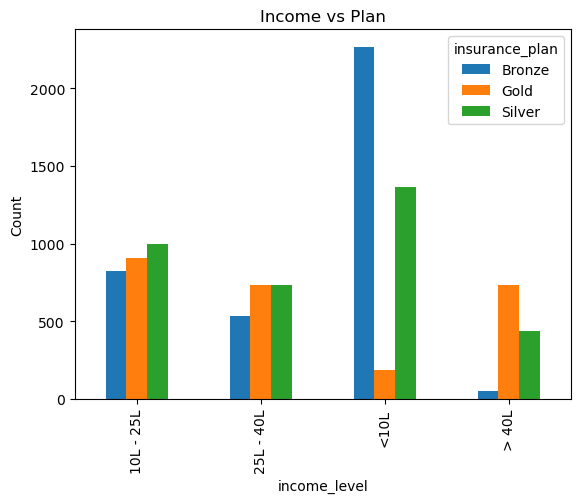

In [226]:
# Cross-tabulation of gender and smoking status
crosstab = pd.crosstab(df4['income_level'], df4['insurance_plan'])
print(crosstab)

# Plotting the crosstab
crosstab.plot(kind='bar', stacked=False)
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

### Categorical column feature engineering

In [36]:
string_columns

Index(['gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'bmi_category', 'smoking_status', 'employment_status',
       'income_level', 'medical_history', 'insurance_plan'],
      dtype='object')

In [37]:
df4.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108


In [232]:
df4.physical_activity.unique()

array([1, 4, 0])

In [230]:
physical_activity_scale= {
   "High": 0,
        "Medium": 1,
        "Low": 4
}

df4["physical_activity"]=df4["physical_activity"].map(physical_activity_scale)

/tmp/ipykernel_294642/2575068705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["physical_activity"]=df4["physical_activity"].map(physical_activity_scale)


In [234]:
df4.physical_activity.unique()

array([1, 4, 0])

In [240]:
df4.stress_level.unique()

array([1, 4, 0])

In [238]:
stress_scale= {
    "High": 4,
        "Medium": 1,
        "Low": 0
}
df4["stress_level"]=df4["stress_level"].map(stress_scale)

/tmp/ipykernel_294642/4271357553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["stress_level"]=df4["stress_level"].map(stress_scale)


In [242]:
df4["stress_level"].isna().sum()

0

In [244]:
df5=df4.copy()

In [246]:
df5["life_style_risk_score"]=df5["stress_level"]+df5["physical_activity"]

In [254]:
df5["life_style_risk_score"].isna().sum()

0

In [248]:
df5.stress_level.unique()

array([1, 4, 0])

In [258]:
df5.bmi_category.unique()

array(['Normal', 'Overweight', 'Obesity', 'Underweight'], dtype=object)

In [262]:
df5.medical_history.unique()

array(['High blood pressure', 'No Disease', 'Thyroid',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes', 'Heart disease', 'Diabetes & High blood pressure',
       'Diabetes & Heart disease'], dtype=object)

In [256]:
df5.describe()

,age,physical_activity,stress_level,number_of_dependants,income_lakhs,annual_premium_amount,life_style_risk_score
count,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000,9767.000000
mean,37.758063,1.556158,1.709123,1.919832,21.976656,19479.674721,3.265281
std,13.972228,1.468313,1.556059,1.502548,21.323039,8896.446809,2.146719
min,18.000000,0.000000,0.000000,0.000000,1.000000,3582.000000,0.000000
25%,24.000000,1.000000,1.000000,0.000000,6.000000,11754.500000,2.000000
50%,37.000000,1.000000,1.000000,2.000000,16.000000,19300.000000,2.000000
75%,50.000000,4.000000,4.000000,3.000000,31.000000,26466.500000,5.000000
max,72.000000,4.000000,4.000000,5.000000,96.000000,45854.000000,8.000000


In [264]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df5[['disease1', 'disease2']] = df5['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df5['disease1'].fillna('none', inplace=True)
df5['disease2'].fillna('none', inplace=True)
df5['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df5['total_risk_score'] += df5[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df5['total_risk_score'].max()
min_score = df5['total_risk_score'].min()
df5['normalized_risk_score'] = (df5['total_risk_score'] - min_score) / (max_score - min_score)
df5.head(2)

/tmp/ipykernel_294642/3554710824.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df5['disease1'].fillna('none', inplace=True)
/tmp/ipykernel_294642/3554710824.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,life_style_risk_score,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,1,1,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,2,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,4,4,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,8,no disease,none,0,0.000000


In [266]:
df5['income_level'] = df5['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [268]:
df5['insurance_plan'] = df5['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [270]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df6 = pd.get_dummies(df5, columns=nominal_cols, drop_first=True, dtype=int)
df6.head(3)

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,life_style_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,1,1,2,3,37,High blood pressure,3,27944,2,...,1,0,1,0,0,0,0,0,0,1
1,38,4,4,5,2,10,No Disease,2,21108,8,...,0,0,0,0,1,0,1,0,0,0
2,18,1,4,0,1,9,No Disease,1,8459,5,...,0,1,1,0,0,0,0,0,0,0


In [278]:
df7=df6.drop(["medical_history","stress_level","physical_activity","total_risk_score","disease1","disease2"],axis=1)

### Model Training